<a href="https://colab.research.google.com/github/junting-huang/data_storytelling/blob/main/case_9_sonification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sonification
- why is sound used for storytelling
  - time-based, immersion, affect, information density
- how is sound used for storytelling
  - converting data into sound

## first example (audification)
- audify waves and movement in the world

# real example (astrophysics)

## second example (parameter/spectral mapping)
- converting numeric parameters into that in sound

# real example (climate change)

## other examples (event-based, model-based, and others)

In [ ]:
pip install MIDIUtil

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for MIDIUtil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54567 sha256=fb58f00e42f5be6e8e75354367097a039d4febe998ba981909abd6542b874a89
  Stored in directory: /root/.cache/pip/wheels/af/43/4a/00b5e4f2fe5e2cd6e92b461995a3a97a2cebb30ab5783501b0
Successfully built MIDIUtil


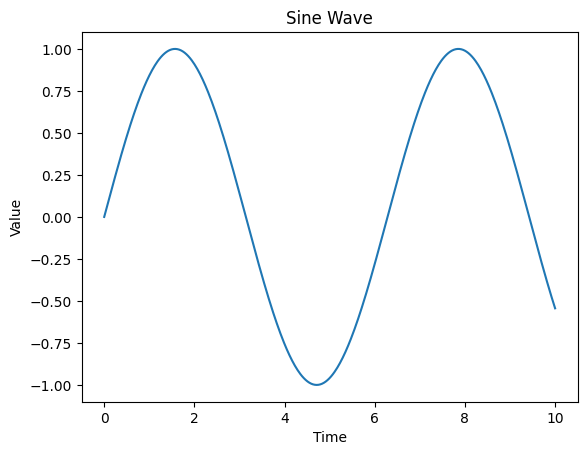

In [ ]:
import matplotlib.pyplot as plt
from midiutil import MIDIFile
import numpy as np

# Let's create some data - a simple sine wave
t = np.linspace(0, 10, 500) # Time array
data = np.sin(t) # Sine wave

# Plotting the data
plt.plot(t, data)
plt.title("Sine Wave")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# MIDI parameters
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM
volume   = 100  # 0-127, as per the MIDI standard

# Create the MIDIFile object
MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)

# Now, we need to convert our data into MIDI note numbers
# Let's map the lowest value to 60 (C4 in MIDI) and the highest to 72 (C5)
min_val = np.min(data)
max_val = np.max(data)
min_midi = 60
max_midi = 72

# Scale the data to MIDI range
midi_data = (data - min_val) / (max_val - min_val) * (max_midi - min_midi) + min_midi
midi_data = midi_data.astype(int)

# Add each note
for i, pitch in enumerate(midi_data):
    MyMIDI.addNote(track, channel, pitch, i, duration, volume)

# And write it to disk.
binfile = open("output.mid", 'wb')
MyMIDI.writeFile(binfile)
binfile.close()


In [ ]:
from midiutil import MIDIFile
import random

def create_midi(data, filename):
    track    = 0
    channel  = 0
    time     = 0   # In beats
    duration = 1   # In beats
    tempo    = 120  # In BPM
    volume   = 100  # 0-127, as per the MIDI standard

    MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track automatically created)
    MyMIDI.addTempo(track, time, tempo)

    for i, d in enumerate(data):
        pitch = d + 21  # MIDI notes range from 21 to 108
        MyMIDI.addNote(track, channel, pitch, time + i, duration, volume)

    with open(filename, "wb") as output_file:
        MyMIDI.writeFile(output_file)

data = [random.randint(0, 88) for _ in range(100)]  # Some random data
create_midi(data, "sonification.mid")

In [ ]:
pip install pydub matplotlib numpy

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


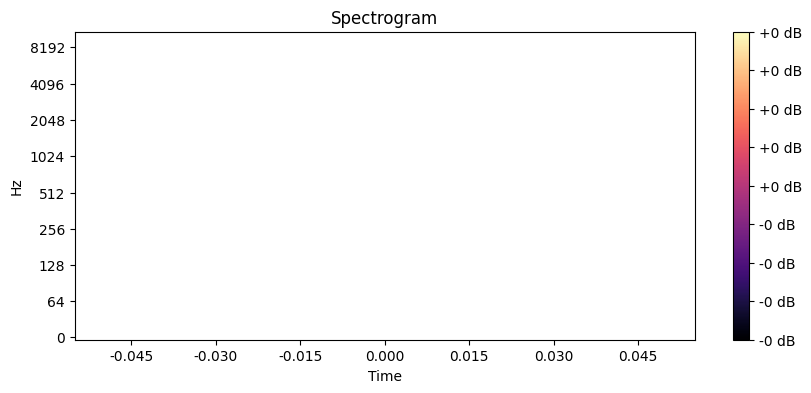

In [ ]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import soundfile as sf

# Define the range of frequencies to be used for sonification
low_freq = 200  # Hz
high_freq = 2000  # Hz

# Sample data in tabular form
data = [
    [0, 1, 2],
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5],
    [4, 5, 4],
    [5, 4, 3],
    [4, 3, 2],
    [3, 2, 1],
    [2, 1, 0],
]

# Map the data to frequencies
mapped_frequencies = [[np.interp(point, (min(row), max(row)), (low_freq, high_freq)) for point in row] for row in data]

# Generate audio for each data point
sound = AudioSegment.empty()
for row in mapped_frequencies:
    sound_row = sum((Sine(frequency).to_audio_segment(duration=500) for frequency in row))
    sound = sound.overlay(sound_row)

# Export the result
sound.export("sonification.wav", format="wav")

# Spectrogram
y, sr = librosa.load('sonification.wav')
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
